# Low-Rank Optimal Transport through Factor Relaxation with Latent Coupling


In [ ]:
import jax
import jax.numpy as jnp

import matplotlib.pyplot as plt

from ott.geometry import pointcloud
from ott.problems.linear import linear_problem
from ott.solvers.linear import sinkhorn, sinkhorn_lr
from ott.tools import plot

In [16]:
a = 2

In [17]:
def create_points(rng, n, m, d):
    rngs = jax.random.split(rng,4)
    x = jax.random.normal(rngs[0], (n, d)) + 1
    y = jax.random.uniform(rngs[1], (m, d))
    a = jax.random.uniform(rngs[2], (n,))
    b = jax.random.uniform(rngs[3], (m,))
    a = a / jnp.sum(a)
    b = b / jnp.sum(b)
    return x, y, a, b

In [18]:
rng = jax.random.key(0)
n, m, d = 19, 35, 2
x, y, a, b = create_points(rng, n=n, m=m, d=d)

geom = pointcloud.PointCloud(x, y, epsilon=0.1)
ot_prob = linear_problem.LinearProblem(geom, a, b)

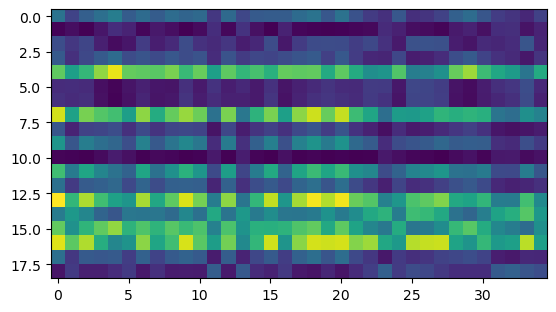

In [24]:
plt.imshow(geom.cost_matrix)

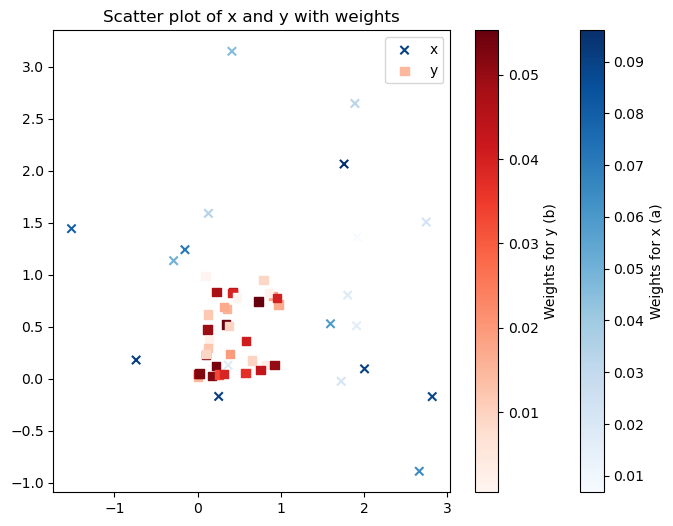

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot for x and y with color mapping
scatter_x = ax.scatter(x[:, 0], x[:, 1], c=a, cmap="Blues", label="x", marker="x")
scatter_y = ax.scatter(y[:, 0], y[:, 1], c=b, cmap="Reds", label="y", marker="s")

# Add colorbars for each scatter plot
cbar_x = plt.colorbar(scatter_x, ax=ax, label="Weights for x (a)", orientation="vertical")
cbar_y = plt.colorbar(scatter_y, ax=ax, label="Weights for y (b)", orientation="vertical")

# Add labels and legend

plt.legend()
plt.title("Scatter plot of x and y with weights")
plt.show()

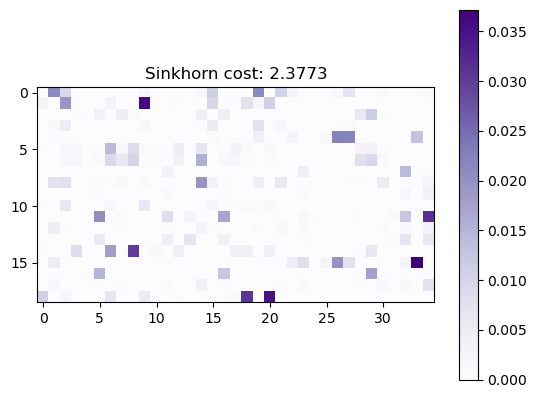

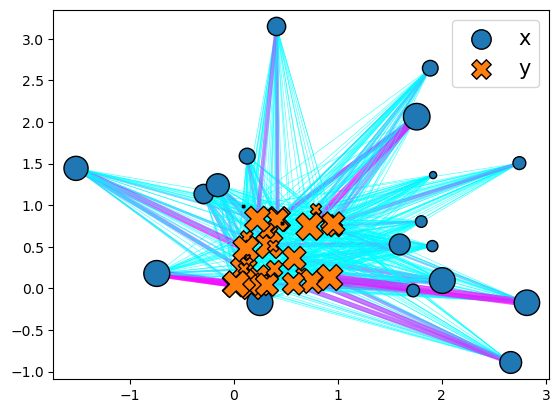

In [21]:
solver = sinkhorn.Sinkhorn()
ot_sink = solver(ot_prob)

plt.imshow(ot_sink.matrix, cmap="Purples")
plt.title(f"Sinkhorn cost: {ot_sink.primal_cost:.4f}")
plt.colorbar()
plt.show()
plott = plot.Plot()
_ = plott(ot_sink)

## Balanced FRLC

In [ ]:
def balanced_frlc(C, r, a, b, tau, gamma, delta, epsilon):
    gq = 1/r*jax.numpy.eye(r)
    gq = 1/r*jax.numpy.eye(r)